# Lab 03: Fun with `pandas`!

Below are some exercises to get you working with `pandas` to manipulate data. As always, get as far as you can, and ask for help when you need it! Your teacher (me), you instructor, and your classmates are all here to help each other get better at coding. Getting the code to work is important, but do also take the time to make sure you understand what the commands are doing. This time, (with the exception of the Stroop challenge), all I've given you is the code to download the data. Then you are on your own. For the Stroop challenge, I gave the you code for the first step—after that, it's up to you :-)

## Music sales challenge

Write a script that:

1. Combines the tables of best-selling physical singles and best-selling digital singles on the Wikipedia page "List_of_best-selling_singles"
2. Adds a column which marks whether each row is from the list of physical singles or digital singles
3. Outputs the artist and single name for the year you were born. If there is no entry for that year, take the closest year after you were born.
4. Outputs the artist and single name for the year you were 15 years old.

In [1]:
# load packages
%pip install lxml
import pandas as pd

# load data
rawdata = pd.read_html("https://en.wikipedia.org/wiki/List_of_best-selling_singles")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 22.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


#### 1. Combines the tables of best-selling physical singles and best-selling digital singles on the Wikipedia page "List_of_best-selling_singles" + 2. Adds a column which marks whether each row is from the list of physical singles or digital singles

In [2]:
# view tables
#print(rawdata)

# make individual dataframes for the relevant tables - I looked at wikipedia to see correct index
physical_singles1 = pd.DataFrame(rawdata[0])
physical_singles2 = pd.DataFrame(rawdata[1])
digital_singles1 = pd.DataFrame(rawdata[3])
digital_singles2 = pd.DataFrame(rawdata[4])

In [5]:
# concatenate dataframes with best-selling physical singles into one dataframe
physical_singles_combined = pd.concat([physical_singles1, physical_singles2])

# concatenate dataframes with best-selling digital singles into one dataframe
digital_singles_combined = pd.concat([digital_singles1, digital_singles2])

# view the dataframes - lesson: when you print() it doesn't look like a df
physical_singles_combined
digital_singles_combined

,Artist,Single,Released,Sales (in millions),Source
0,Ed Sheeran,"""Shape of You""",2017,41.5[a],[47][48]
1,Luis Fonsi featuring Daddy Yankee,"""Despacito""",2017,36.1[a],[47][48]
2,Rihanna featuring Drake,"""Work""",2016,32.5[a],[49]
3,The Chainsmokers and Coldplay,"""Something Just Like This""",2017,21.5[a],[47][48]
4,Ed Sheeran,"""Perfect""",2017,21.4[a],[47][48]
...,...,...,...,...,...
35,Bruno Mars,"""Grenade""",2010,10.2,[68]
36,Mike Posner,"""I Took a Pill in Ibiza""",2015,10[a],[51]
37,Shakira featuring Freshlyground,"""Waka Waka (This Time for Africa)""",2010,10,[77]
38,Shakira featuring Wyclef Jean,"""Hips Don't Lie""",2006,10,[78]


In [6]:
# add column for both dataframes stating that they are digital/physical
physical_singles_combined['type'] = 'physical'
digital_singles_combined['type'] = 'digital'

# view data again
physical_singles_combined
digital_singles_combined

,Artist,Single,Released,Sales (in millions),Source,type
0,Ed Sheeran,"""Shape of You""",2017,41.5[a],[47][48],digital
1,Luis Fonsi featuring Daddy Yankee,"""Despacito""",2017,36.1[a],[47][48],digital
2,Rihanna featuring Drake,"""Work""",2016,32.5[a],[49],digital
3,The Chainsmokers and Coldplay,"""Something Just Like This""",2017,21.5[a],[47][48],digital
4,Ed Sheeran,"""Perfect""",2017,21.4[a],[47][48],digital
...,...,...,...,...,...,...
35,Bruno Mars,"""Grenade""",2010,10.2,[68],digital
36,Mike Posner,"""I Took a Pill in Ibiza""",2015,10[a],[51],digital
37,Shakira featuring Freshlyground,"""Waka Waka (This Time for Africa)""",2010,10,[77],digital
38,Shakira featuring Wyclef Jean,"""Hips Don't Lie""",2006,10,[78],digital


In [7]:
# finally, combine the dataframes into one (which also has the type column stating whether the best-selling single is physical or digital)
combined_singles = pd.concat([physical_singles_combined, digital_singles_combined])

# view df
combined_singles

,Artist,Single,Released,Sales (in millions),Source,type
0,Bing Crosby,"""White Christmas""",1942,50,[1],physical
1,Elton John,"""Something About the Way You Look Tonight""/""Ca...",1997,33,[1],physical
2,Bing Crosby,"""Silent Night""",1935,30,[2],physical
3,Tino Rossi,"""Petit Papa Noël""",1946,30,[3],physical
4,Bill Haley & His Comets,"""Rock Around the Clock""",1954,25,[4][5],physical
...,...,...,...,...,...,...
35,Bruno Mars,"""Grenade""",2010,10.2,[68],digital
36,Mike Posner,"""I Took a Pill in Ibiza""",2015,10[a],[51],digital
37,Shakira featuring Freshlyground,"""Waka Waka (This Time for Africa)""",2010,10,[77],digital
38,Shakira featuring Wyclef Jean,"""Hips Don't Lie""",2006,10,[78],digital


#### 3. Outputs the artist and single name for the year you were born. If there is no entry for that year, take the closest year after you were born.

In [ ]:
# view singles from 2001 - there are none:(
combined_singles[combined_singles['Released'] == 2001]

In [28]:
# view singles from 2003
combined_singles[combined_singles['Released'] == 2003]

,Artist,Single,Released,Sales (in millions),Source,type
5,O-Zone,"""Dragostea din tei""",2003,12.0,[22],physical


#### 4. Outputs the artist and single name for the year you were 15 years old.

In [29]:
# view singles from 2016
combined_singles[combined_singles['Released'] == 2016]

,Artist,Single,Released,Sales (in millions),Source,type
2,Rihanna featuring Drake,"""Work""",2016,32.5[a],[49],digital
6,The Chainsmokers featuring Halsey,"""Closer""",2016,20.7[a],[51][47],digital
16,Rihanna,"""Needed Me""",2016,17.0[a],[49],digital
13,Drake featuring Wizkid and Kyla,"""One Dance""",2016,12.5[a],[51],digital
25,Sia featuring Sean Paul,"""Cheap Thrills""",2016,11.1[a],[51],digital
33,The Chainsmokers featuring Daya,"""Don't Let Me Down""",2016,10.2[a],[51],digital


## Space challenge

1. Make a single dataframe that combines the space missions from the 1950's to the 2020's
2. Write a script that returns the year with the most launches
3. Write a script that returns the most common month for launches
4. Write a script that ranks the months from most launches to fewest launches


In [32]:
# Starter code...

#%pip install lxml
import pandas as pd

rawdata = pd.read_html("https://en.wikipedia.org/wiki/Timeline_of_Solar_System_exploration")
#rawdata

#### 1. Make a single dataframe that combines the space missions from the 1950's to the 2020's

In [65]:
# make dictionary to hold the newly created dataframe
dataframes = {}

# trying to OPTIMIZE - loop through all the tables to make dataframes
for i in range(len(rawdata)):
    dataframes[f'dataframe_{i}'] = pd.DataFrame(rawdata[i])

# concatenate into one dataframe
combined_df = pd.concat(dataframes.values())
combined_df

,Mission name,Launch date,Description,Ref(s),vteSpaceflight lists and timelines,vteSpaceflight lists and timelines.1,0,1,vteExploration of the Solar System,vteExploration of the Solar System.1,vteNASA planetary exploration programs,vteNASA planetary exploration programs.1,vteSolar System,vteSolar System.1
0,Sputnik 1,4 October 1957,First Earth orbiter,[1][2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sputnik 2,3 November 1957,"Earth orbiter, first animal in orbit, a dog na...",[2][3][4],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Explorer 1,1 February 1958,Earth orbiter; discovered Van Allen radiation ...,[5],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vanguard 1,17 March 1958,Earth orbiter; oldest spacecraft still in Eart...,[6],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Luna 1,2 January 1959,First lunar flyby (attempted lunar impact?); f...,[7][8][9][10],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,Hypothetical objects,Fifth giant Nemesis Phaeton Planet Nine Planet...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Exploration (outline),Colonization Discovery astronomy historical mo...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"Formation, evolution",Star formation Accretion Accretion disk Excret...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Lists,Comets Possible dwarf planets Gravitationally ...,NaN,NaN,NaN,NaN,NaN,NaN


##### Soo it technically worked, but it's adding a bunch of columns and rows that doesn't look like it's a part of the wiki tables - next step: optimizing but ensuring to only keep the relevant data

In [68]:
# make dictionary to hold the newly created dataframes
dataframes = [] # not these {} because I'll append later

# loop through all the tables to make dataframes (but I can see on wiki that they all have only 4 columns, so I'll specify that I only want the tables with 4 columns
for i in range(len(rawdata)):
    if len(rawdata[i].columns) == 4:  # check if there are exactly 4 columns
        dataframes.append(rawdata[i])  # add to the dataframes list

# concatenate into one df
combined_df = pd.concat(dataframes, ignore_index=True)

# view combined df - to be fair, I'm not sure this method is the best... maybe there's a better way than to specify n columns
combined_df

,Mission name,Launch date,Description,Ref(s)
0,Sputnik 1,4 October 1957,First Earth orbiter,[1][2]
1,Sputnik 2,3 November 1957,"Earth orbiter, first animal in orbit, a dog na...",[2][3][4]
2,Explorer 1,1 February 1958,Earth orbiter; discovered Van Allen radiation ...,[5]
3,Vanguard 1,17 March 1958,Earth orbiter; oldest spacecraft still in Eart...,[6]
4,Luna 1,2 January 1959,First lunar flyby (attempted lunar impact?); f...,[7][8][9][10]
...,...,...,...,...
228,Peregrine Mission One (including Iris and Colm...,8 January 2024,Lunar lander and rovers (landing precluded),[504]
229,IM-1 Nova-C Odysseus (including EagleCam deplo...,15 February 2024,Lunar landers,[505]
230,DRO A/B,13 March 2024,Lunar orbiters,[506]
231,Queqiao-2 (including Tiandu-1 and 2),20 March 2024,Lunar orbiters,[507]


#### 2. Write a script that returns the year with the most launches


In [72]:
# split string by spaces so we have only the years, not the dates or months since they're kinda unnecessary for this task (makes next step easier)
combined_df['Year'] = combined_df['Launch date'].str.split().str[-1] # -1 cause then we keep e.g. 1957 from "4 October 1957"

# count number of launches per year
launch_counts = combined_df['Year'].value_counts()

# identify the year with the most launches
year_with_most_launches = launch_counts.idxmax()

# get the number of launches for that year
most_launches_count = launch_counts.max()

# make a very user-friendly output :)
print(f"The year with the most launches is {year_with_most_launches} with {most_launches_count} launches")

The year with the most launches is 1965 with 12 launches


#### 3. Write a script that returns the most common month for launches - I'm not sure if this means 1) the months with most launches out of all months or 2) the month with most launches in 1965 - so I'll do both👹

In [86]:
# 1) the month with most launches out of all months

# split string by spaces so we have only the months, not the dates or years since they're kinda unnecessary for this task (makes next step easier)
combined_df['Month'] = combined_df['Launch date'].str.split().str[-2] # a year column is added, so the original values in 'Launch date' column should remain unchanged 

# count number of launches per month
launch_counts = combined_df['Month'].value_counts()

# identify the month with the most launches
month_with_most_launches = launch_counts.idxmax()

# get the number of launches for that month
most_launches_count = launch_counts.max()

# make a very user-friendly output :)
print(f"The month with the most launches is {month_with_most_launches} with {most_launches_count} launches")

The month with the most launches is November with 30 launches


In [87]:
# 2) the month with most launches in 1965

# split string by spaces so we have only the years
combined_df['Year'] = combined_df['Launch date'].str.split().str[-1]

# filter the df for launches in 1965
launches_1965 = combined_df[combined_df['Year'] == '1965'].copy() # .copy() creates a new copy of the df so we avoid the warning thing

# extract the month from the 1965 df
launches_1965['Month'] = launches_1965['Launch date'].str.split().str[-2]

# count number of launches per month in 1965
month_counts = launches_1965['Month'].value_counts()

# identify the month with the most launches
month_with_most_launches = month_counts.idxmax()

# get the number of launches for that month
most_launches_count = month_counts.max()

# make a very user-friendly output :)
print(f"The month with the most launches in 1965 is {month_with_most_launches} with {most_launches_count} launches.")

The month with the most launches in 1965 is March with 2 launches.


#### 4. Write a script that ranks the months from most launches to fewest launches

In [94]:
# I'm doing months in general, not from 1965

# split string by spaces so we have only the months, not the dates or years since they're kinda unnecessary for this task (makes next step easier)
combined_df['Month'] = combined_df['Launch date'].str.split().str[-2] # a year column is added, so the original values in 'Launch date' column should remain unchanged 

# count number of launches per month
launch_counts = combined_df['Month'].value_counts()

# sort the counts in descending order
sorted_launch_counts = launch_counts.sort_values(ascending=False)

# make a very user-friendly output :)
print("Months ranked from most to least number of launches:\n")
for month, count in sorted_launch_counts.items():
    print(f"{month}: {count} launches")

Months ranked from most to least number of launches:

November: 30 launches
August: 27 launches
September: 22 launches
October: 22 launches
July: 21 launches
January: 19 launches
December: 19 launches
May: 17 launches
March: 15 launches
February: 14 launches
June: 14 launches
April: 13 launches


## Supervillain challenge

1. Write a script that combines the tables showing supervillain debuts from the 30's through the 2010's
2. Write a script that ranks each decade in terms of how many supervillains debuted in that decade
3. Write a script that ranks the different comics companies in terms of how many supervillains they have, and display the results in a nice table (pandas dataframe)

In [95]:
# load data
rawdata = pd.read_html("https://en.wikipedia.org/wiki/List_of_comic_book_supervillain_debuts")

#### 1. Write a script that combines the tables showing supervillain debuts from the 30's through the 2010's

In [166]:
# make dictionary to hold the newly created dataframes
dataframes = [] # not these {} because I'll append later

# loop through all the tables to make dataframes (but I can see on wiki that they all have only 5 columns, so I'll specify that I only want the tables with 4 columns
for i in range(len(rawdata)):
    if len(rawdata[i].columns) == 5:  # check if there are exactly 5 columns
        dataframes.append(rawdata[i])  # add to the dataframes list

# concatenate into one df
combined_df = pd.concat(dataframes, ignore_index=True)

# view combined df
combined_df

,Character / Team,Year Debuted,Company,Creator/s,First Appearance
0,Ultra-Humanite,1939 (June),DC,"Jerry Siegel, Joe Shuster",Action Comics (vol. 1) #13
1,Dr. Death,1939 (July),DC,"Bob Kane, Bill Finger",Detective Comics (vol. 1) #29
2,The Monk,1939 (September),DC,"Bob Kane, Bill Finger",Detective Comics (vol. 1) #31
3,The Claw,1939 (December),Lev Gleason Publications,Jack Cole,Silver Streak Comics #1
4,Hath-Set,1940 (January),DC,"Gardner Fox, Dennis Neville",Flash Comics #1
...,...,...,...,...,...
631,Bloodwork,2016 (August),DC,Brian Buccellato,The Flash #28
632,Godspeed,2016 (August),DC,"Joshua Williamson, Carmine Di Giandomenico",The Flash: Rebirth #1
633,The Hamster (Mr. Hansen),2017,Disney/Hyperion,Rhode Montijo,The Gumazing Gum Girl! Book 2: Gum Luck
634,The Underhander,2019,Disney/Hyperion,Rhode Montijo,The Gumazing Gum Girl! Book 4: Cover Blown!


#### 2. Write a script that ranks each decade in terms of how many supervillains debuted in that decade

In [107]:
# extract the regular expression of four digits (that way we can get the years from both the rows that say "1971" and "1976 (October)"
combined_df['Year debuted2'] = combined_df['Year Debuted'].str.extract(r'(\d{4})')

# extract the first three characters and add '0s' to indicate the decade
combined_df['Decade debuted'] = combined_df['Year debuted2'].str[:3] + '0s'

# count number of supervillains that have debuted in each decade
debuts_counts = combined_df['Decade debuted'].value_counts()

# sort the counts in descending order
sorted_debuts_counts = debuts_counts.sort_values(ascending=False)

# make a very user-friendly output :)
print("Decades ranked from most to least supervillain debuts:\n")
for decade, count in sorted_debuts_counts.items():
    print(f"{decade}: {count} debuts")

Decades ranked from most to least supervillain debuts:

1960s: 228 debuts
1970s: 97 debuts
1980s: 92 debuts
1990s: 84 debuts
2000s: 49 debuts
1940s: 47 debuts
1950s: 26 debuts
2010s: 9 debuts
1930s: 4 debuts


#### 3. Write a script that ranks the different comics companies in terms of how many supervillains they have, and display the results in a nice table (pandas dataframe)

In [124]:
# count number of supervillains that have debuted from each company
supervillain_counts = combined_df.groupby('Company')['Character / Team'].count()

# sort the counts in descending order
sorted_supervillain_counts = supervillain_counts.sort_values(ascending=False)

# store the results in a new df
ranked_companies_df = sorted_supervillain_counts.reset_index(name='Number of Supervillains') # reset_index converts the sorted series back into a df
ranked_companies_df

,Company,Number of Supervillains
0,DC,338
1,Marvel,264
2,Fawcett Comics/DC,6
3,Dark Horse,5
4,Image,5
5,Disney/Hyperion,4
6,Marvel/Timely,4
7,Eternity,3
8,Comico,1
9,Image Comics,1


## Stroop challenge

Every year between 2015 and 2021, the students in my Language, Cognition, and the Brain course participated in a version of the Stroop task. Using a stopwatch (ok, using their phones), they recorded how fast they could say a list of things (either reading or naming colors or color words). The column names mean "Reading with No Interference", "Naming with Interference", "Naming with No Interference", and "Reading with Interference". The times are in seconds.

### Stroop challenge 1: 
Transform these data from wide format to long format, so that the result is a dataframe with
- 1 column named "Participant_id" with a unique number for each participant (you can use the row indices)
- 1 column named "Year" with the year data
- 1 column named "Task" that shows which task they were doing
- 1 column named "RT" that shows their response time

In [143]:
# Starter code 1...

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/Stroop/master/Stroop-raw-over-the-years.csv")
df.head()

,Reading_NoInt,Naming_Int,Naming_NoInt,Reading_Int,Year
0,4.16,6.76,4.45,4.65,2015
1,4.35,7.73,4.78,4.46,2015
2,3.60,7.00,4.00,3.50,2015
3,3.90,9.03,4.60,6.30,2015
4,4.22,9.98,6.83,6.24,2015


In [144]:
# Starter code 2...

# Make a new column using the dataframe indices as particpant numbers

df.index.name = 'Participant_id'
df = df.reset_index()

#df.reset_index(inplace = True)
# NOTE: This line does exactly the same thing as the line above:
# it replaces the original df with a new df with the updated index. That's what
# "inplace = True" means. Or, you can just assign the dataframe with the updated index
# to a new dataframe with the same name as the old dataframe, which is what I did above.
# The end result is the same.

df

,Participant_id,Reading_NoInt,Naming_Int,Naming_NoInt,Reading_Int,Year
0,0,4.16,6.76,4.45,4.65,2015
1,1,4.35,7.73,4.78,4.46,2015
2,2,3.60,7.00,4.00,3.50,2015
3,3,3.90,9.03,4.60,6.30,2015
4,4,4.22,9.98,6.83,6.24,2015
...,...,...,...,...,...,...
177,177,4.30,7.08,6.25,4.28,2021
178,178,4.75,9.66,6.12,5.49,2021
179,179,4.98,7.52,6.73,5.16,2021
180,180,5.16,8.81,8.19,5.51,2021


In [148]:
# doing it fr here

# use pd.melt to transform data from wide to long format (it can "melt" columns into rows whaaat)
long_format_df = pd.melt(df, id_vars=['Participant_id', 'Year'], # keeping 'Participant_id' and 'Year' column (so essentially they act as the identifiers that link the data)
                    value_vars=['Reading_NoInt', 'Naming_Int', 'Naming_NoInt', 'Reading_Int'], # these are the columns we want to melt into rows. Btw var means variables
                    var_name='Task', # name the new column that will hold the *names* of the columns we melted 
                    value_name='RT (s)') # name the new column that will hold the *values* from the columns we melted 

# sort by participant
long_format_df = long_format_df.sort_values(by=['Participant_id'])

# reset the index cause the numbers don't make sense after sorting
finito_df = long_format_df.reset_index(drop=True)

# view new df
finito_df


,Participant_id,Year,Task,RT (s)
0,0,2015,Reading_NoInt,4.16
1,0,2015,Reading_Int,4.65
2,0,2015,Naming_NoInt,4.45
3,0,2015,Naming_Int,6.76
4,1,2015,Naming_NoInt,4.78
...,...,...,...,...
723,180,2021,Naming_NoInt,8.19
724,181,2021,Naming_NoInt,5.32
725,181,2021,Reading_Int,4.59
726,181,2021,Naming_Int,10.40


## Stroop challenge 2 (Advanced!!!):

Make a new dataframe which shows the mean response time (in seconds) for each task for each year.

In [164]:
# group finito_df by 'Year' and 'Task'
year_task_df = finito_df.groupby(['Year', 'Task'])

# calculate the mean of the 'RT (s)' for each combination of "Year" and "Task"
mean_rt = year_task_df['RT (s)'].mean()

# convert result back to a df
mean_df = mean_rt.reset_index()

# rename the 'RT (s)' column to 'Mean RT (s)'
mean_df.rename(columns={'RT (s)': 'Mean RT (s)'}, inplace=True)

# view df
mean_df

,Year,Task,Mean RT (s)
0,2015,Naming_Int,8.617143
1,2015,Naming_NoInt,5.123571
2,2015,Reading_Int,4.446429
3,2015,Reading_NoInt,3.951429
4,2016,Naming_Int,8.859268
5,2016,Naming_NoInt,5.405610
6,2016,Reading_Int,5.340000
7,2016,Reading_NoInt,4.076098
8,2017,Naming_Int,9.311765
9,2017,Naming_NoInt,5.771176


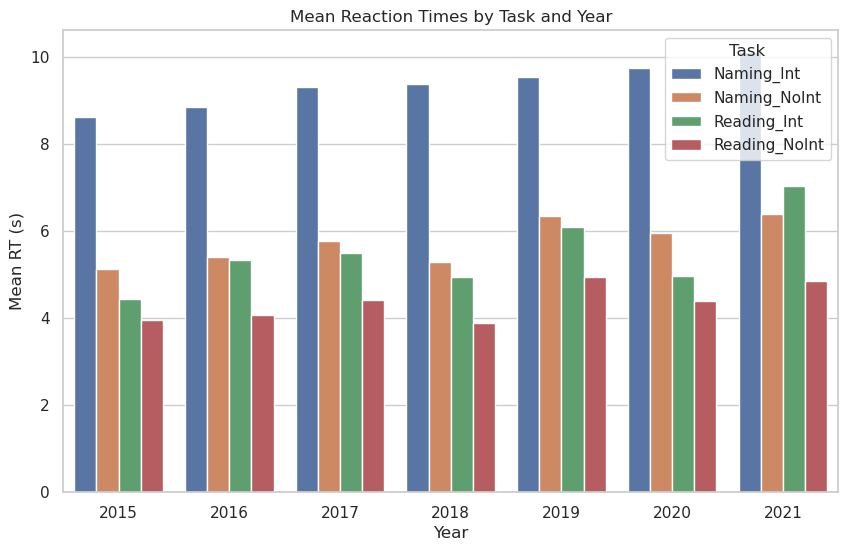

In [163]:
# I can't not plot this🔥

# install libraries
#%pip install seaborn matplotlib

# load em
import seaborn as sns
import matplotlib.pyplot as plt

# make bar plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(data=mean_df, x='Year', y='Mean RT (s)', hue='Task', errorbar=None)

# adding labels and title
plt.title('Mean Reaction Times by Task and Year')
plt.xlabel('Year')
plt.ylabel('Mean RT (s)')
plt.legend(title='Task')

# show plot
plt.show()


### Done🔥🔥🔥